In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Activation,Dropout,Flatten,Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
import keras

Using TensorFlow backend.


In [2]:
# 定义模型
#reshape_size
reshape_size = (258,258,3)
W_H = (258,258)
model = Sequential()
model.add(Conv2D(input_shape=reshape_size,filters=32,kernel_size=2,padding='same',activation='relu'))
# model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
# model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128,kernel_size=2,padding='same',activation='relu'))
# model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation='softmax'))


adam = Adam(lr=1e-4)


model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [3]:
train_datagen = ImageDataGenerator(
    rotation_range = 40,     # random rotation angle
    width_shift_range = 0.2, 
    height_shift_range = 0.2,# random shift
    rescale = 1/255,         # data standarized
    shear_range = 0.2,       
    
    zoom_range = 0.2,        # random amplify
    horizontal_flip = True,  
    fill_mode = 'nearest',   # filling method after shift
) 
test_datagen = ImageDataGenerator(
    rescale = 1/255,         # data standarized
) 

In [4]:
batch_size = 32

# 400 images for training  with batch_size, so one epoch need to feed 400//32 = 12 times to generate 400 images
train_generator_test = train_datagen.flow_from_directory(
    'image/train', ### cats and dogs
    target_size=W_H,
    batch_size=batch_size,
    save_to_dir='train_generate',
    save_prefix  ='train_',
    save_format='jpg'
    )

train_generator = train_datagen.flow_from_directory(
    'image/train', ### cats and dogs
    target_size=W_H,
    batch_size=batch_size,
    )

# 测试数据
test_generator = test_datagen.flow_from_directory(
    'image/test',
    target_size=W_H,
    batch_size=batch_size,
    )

Found 400 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [5]:
### generate 12 times
### check the quality of data generated to ajust the parameter
n = 0
for batch in train_generator_test:
    if n!=12:
        n+=1
    else:
        break

In [6]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [7]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=test_generator.n//test_generator.batch_size

In [8]:
STEP_SIZE_TRAIN

12

In [9]:
data  = train_generator.next

#### each epoch: generator will generare the imagae with 32 batch size 13 times and with different images after data Augmentation

In [10]:
### callback function to visulize
callbacks = [
    keras.callbacks.TensorBoard(
    log_dir='log_dir')
]

In [11]:
model.fit_generator(generator = train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test_generator,validation_steps=STEP_SIZE_VALID,
                    epochs = 20,
                   callbacks = callbacks)

Epoch 1/20
12/12 [==============================] - 16s - loss: 0.7837 - acc: 0.5156 - val_loss: 0.6908 - val_acc: 0.4896
Epoch 2/20
12/12 [==============================] - 13s - loss: 0.7143 - acc: 0.5026 - val_loss: 0.6888 - val_acc: 0.5119
Epoch 3/20
12/12 [==============================] - 10s - loss: 0.6936 - acc: 0.5056 - val_loss: 0.6889 - val_acc: 0.4881
Epoch 4/20
12/12 [==============================] - 10s - loss: 0.6900 - acc: 0.5237 - val_loss: 0.6861 - val_acc: 0.4881
Epoch 5/20
12/12 [==============================] - 11s - loss: 0.6814 - acc: 0.5673 - val_loss: 0.6796 - val_acc: 0.6310
Epoch 6/20
12/12 [==============================] - 10s - loss: 0.6833 - acc: 0.5649 - val_loss: 0.6719 - val_acc: 0.5179
Epoch 7/20
12/12 [==============================] - 11s - loss: 0.6775 - acc: 0.5577 - val_loss: 0.6781 - val_acc: 0.5938
Epoch 8/20
12/12 [==============================] - 11s - loss: 0.6741 - acc: 0.5701 - val_loss: 0.6795 - val_acc: 0.5119
Epoch 9/20
12/12 [======

In [18]:
# pip install h5py
model.save('model_cnn.h5')

### Testing

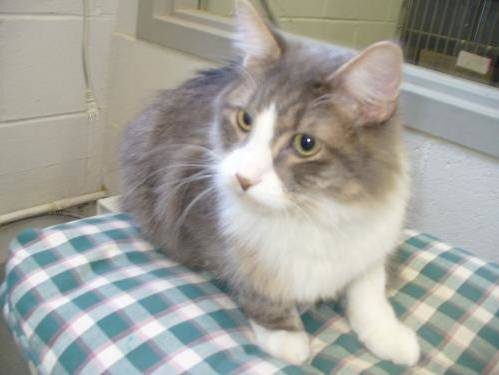

In [19]:
from keras.models import load_model
import numpy as np

label = np.array(['cat','dog'])
# 载入模型
model = load_model('model_cnn.h5')

# 导入图片
image = load_img('image/test/cat/cat.1029.jpg')
image

In [20]:
image = image.resize(W_H)

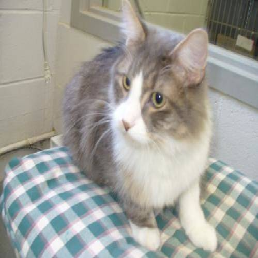

In [21]:
image

In [22]:
image = img_to_array(image)
image = image/255
image = np.expand_dims(image,0)
image.shape

(1, 258, 258, 3)

In [23]:
print(label[model.predict_classes(image)])

1/1 [==============================] - 0s
['cat']
